In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append("/home/mongardi/Metagene_repo/src")
from run_experiments import * 
from utils.utils import *

In [4]:
sys.path.append("/home/mongardi/Metagene_repo/src/prior_knowledge")
from create_kegg_pathways_matrix import KEGG_pathways_matrix

In [5]:
dire_BRCA ='/home/mongardi/Metagene_repo/data/data_BRCA'
dire_prior ='/home/mongardi/Metagene_repo/data/prior_knowledge'
dire_BRCA_results = '/home/mongardi/Metagene_repo/results/BRCA'

In [6]:
# load dataset
df = pd.read_csv(os.path.join(dire_BRCA, 'BRCA_dataset.csv'), index_col='sample_id')
df.head()

X = df.drop(['expert_PAM50_subtype'], axis=1)
y = y = df['expert_PAM50_subtype']

In [7]:
# KEGG overlap
ids_file = '/home/mongardi/Metagene_repo/data/prior_knowledge/genes_and_ids_all_red.csv'
kegg_filename = '/home/mongardi/Metagene_repo/data/prior_knowledge/kegg_gene_pathways_names.csv'
kegg_pathways = '/home/mongardi/Metagene_repo/data/prior_knowledge/kegg_hsa_pathways.txt'
get_kegg_pathways_matrix = KEGG_pathways_matrix(kegg_pathways, kegg_filename, ids_file, X.columns)
get_kegg_pathways_matrix.build_matrix()
get_kegg_pathways_matrix.get_symbol_matrix(get_kegg_pathways_matrix.pm)

100%|██████████| 17924/17924 [01:09<00:00, 257.55it/s]


In [8]:
matching_set_dir = os.path.join(dire_prior, 'BRCA_pathway_gene_ids.txt')
matching_set_cancer_dir = os.path.join(dire_prior, 'cancer_pathway_gene_ids.txt')
matching_set = get_kegg_pathways_matrix.load_txt(matching_set_dir)
matching_set_cancer = get_kegg_pathways_matrix.load_txt(matching_set_cancer_dir)

In [9]:
results_dire_1 = os.path.join(dire_BRCA_results, 'multi_lasso')
union_genes, intersection_genes = get_union_inter(results_dire_1, X, n_splits=10)
df_1= get_selected_genes(results_dire_1, intersection_genes, union_genes, 10, 4)  

195
194


In [10]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 194
Number of matches:  4
Percentages of matching genes:  0.020618556701030927
The total number of genes with KEGG annotations in the dataset: 194
Number of matches:  18
Percentages of matching genes:  0.09278350515463918


In [11]:
results_dire_2= os.path.join(dire_BRCA_results, 'multi_lasso_gis_go_reactome_hpo')
union_genes, intersection_genes = get_union_inter(results_dire_2, X, n_splits=10)
df_2= get_selected_genes(results_dire_2, intersection_genes, union_genes, 10, 4) 

214
214


In [12]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 214
Number of matches:  7
Percentages of matching genes:  0.03271028037383177
The total number of genes with KEGG annotations in the dataset: 214
Number of matches:  21
Percentages of matching genes:  0.09813084112149532


# Visualize Results

File 1
  Subtype      N      GO  GO sig   KEGG  KEGG sig  REACTOME  REACTOME sig  \
0   Basal   30.0  1564.0   124.0   23.0       0.0     104.0           0.0   
1    Her2   51.0  2376.0     0.0  100.0       0.0     361.0           3.0   
2    LumA   76.0  2747.0   170.0   86.0       2.0     346.0          44.0   
3    LumB   57.0  2267.0    30.0   78.0       1.0     164.0           9.0   
4     all  194.0  4604.0   195.0  177.0       0.0     641.0          25.0   

      HPO  HPO sig  
0   967.0      0.0  
1   921.0      0.0  
2  1519.0     17.0  
3  1165.0     92.0  
4  2413.0      2.0  
File 2
  Subtype      N      GO  GO sig   KEGG  KEGG sig  REACTOME  REACTOME sig  \
0   Basal   30.0  1871.0   305.0   28.0       0.0     105.0           0.0   
1    Her2   56.0  2685.0    39.0  118.0       0.0     381.0           3.0   
2    LumA   86.0  3159.0   244.0  102.0       1.0     495.0          62.0   
3    LumB   63.0  2518.0    30.0   93.0       1.0     245.0           9.0   
4     all  2

/home/mongardi/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


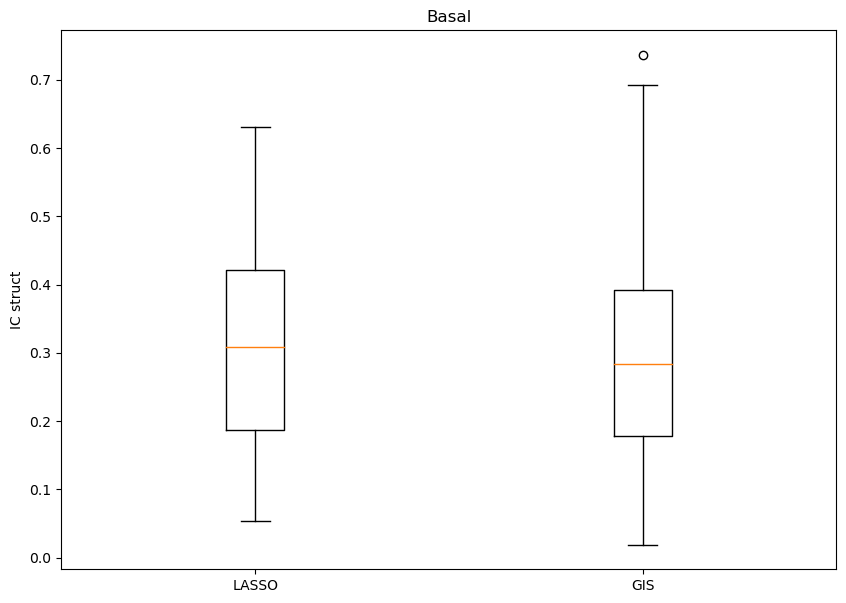


--------------------- Her2 ---------------------

T-test Proportions
----GO----
0.000
----KEGG----
nan
----Reactome----
0.526
----HPO----
0.076
----GO----
1.130
----KEGG----
1.180
----Reactome----
1.055
----HPO----
1.461

--------------------- LumA ---------------------

T-test Proportions
----GO----
0.011
----KEGG----
0.768
----Reactome----
0.533
----HPO----
0.000
----GO----
1.150
----KEGG----
1.186
----Reactome----
1.431
----HPO----
1.303
--------Statistics--------
File 1
Min: 0.0227523534487934 Max: 0.8 Mean: 0.29842171079081753 std: 0.02390746907798248
File 2
Min: 0.00976853942018 Max: 0.8 Mean: 0.295783010330642 std: 0.023298404156870206


/home/mongardi/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


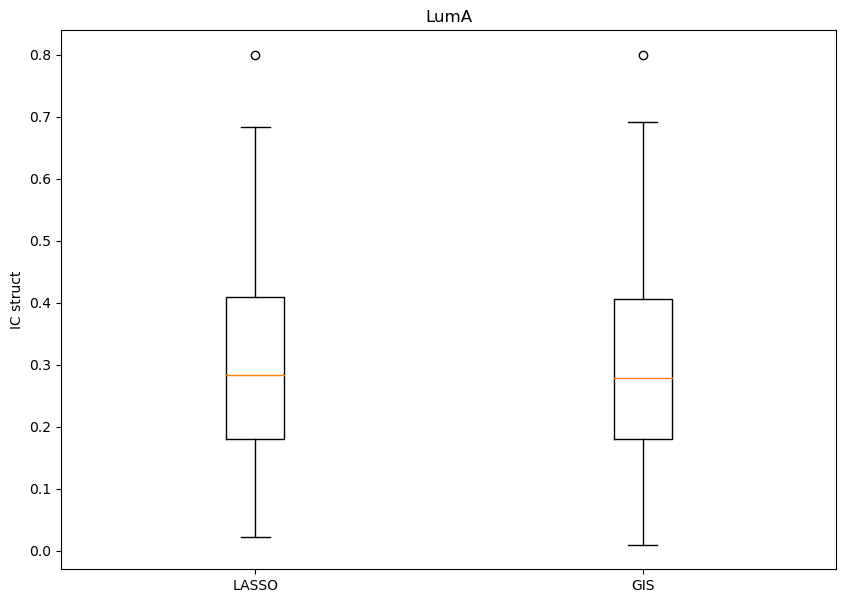


--------------------- LumB ---------------------

T-test Proportions
----GO----
0.659
----KEGG----
0.550
----Reactome----
0.810
----HPO----
0.108
----GO----
1.111
----KEGG----
1.192
----Reactome----
1.494
----HPO----
1.375
--------Statistics--------
File 1
Min: 0.1588216173203293 Max: 0.6842105263157895 Mean: 0.37842477192773377 std: 0.020830269637123228
File 2
Min: 0.0435352014095803 Max: 0.6842105263157895 Mean: 0.3599741126508282 std: 0.026991276992116387


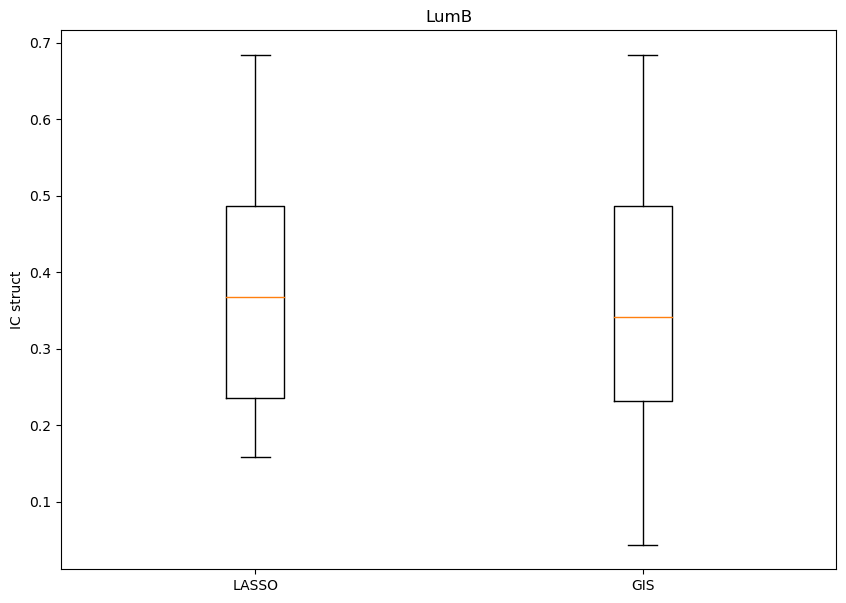


--------------------- all ---------------------

T-test Proportions
----GO----
0.000
----KEGG----
nan
----Reactome----
0.486
----HPO----
0.000
----GO----
1.129
----KEGG----
1.164
----Reactome----
1.268
----HPO----
1.261
--------Statistics--------
File 1
Min: 0.0227523534487934 Max: 0.8461538461538461 Mean: 0.31329779996012713 std: 0.023611999827151765
File 2
Min: 0.0004809209957919 Max: 0.8461538461538461 Mean: 0.27344898254927635 std: 0.02340032708759188


/home/mongardi/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


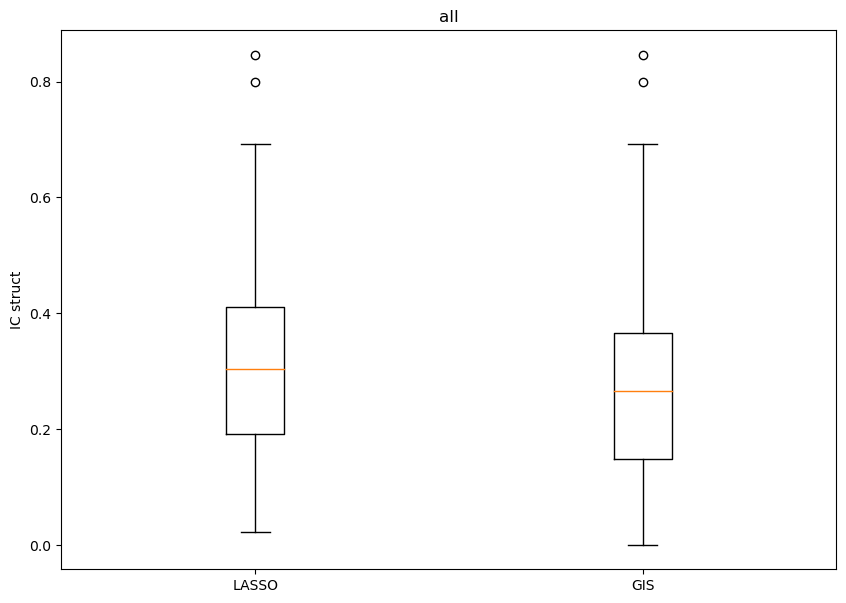

In [13]:
get_info_enriched_terms(results_dire_1, results_dire_2)

194
194
214
214
--------------- 0 --------------------
30
0.2463815105117565
30
CCNO       0.055410
CEACAM5    0.023971
FERMT1     0.073859
XBP1       0.077373
ZIC1       0.104651
Name: 0, dtype: float64
Shared genes:  25
0.32642280470350127
0.24106645584106445


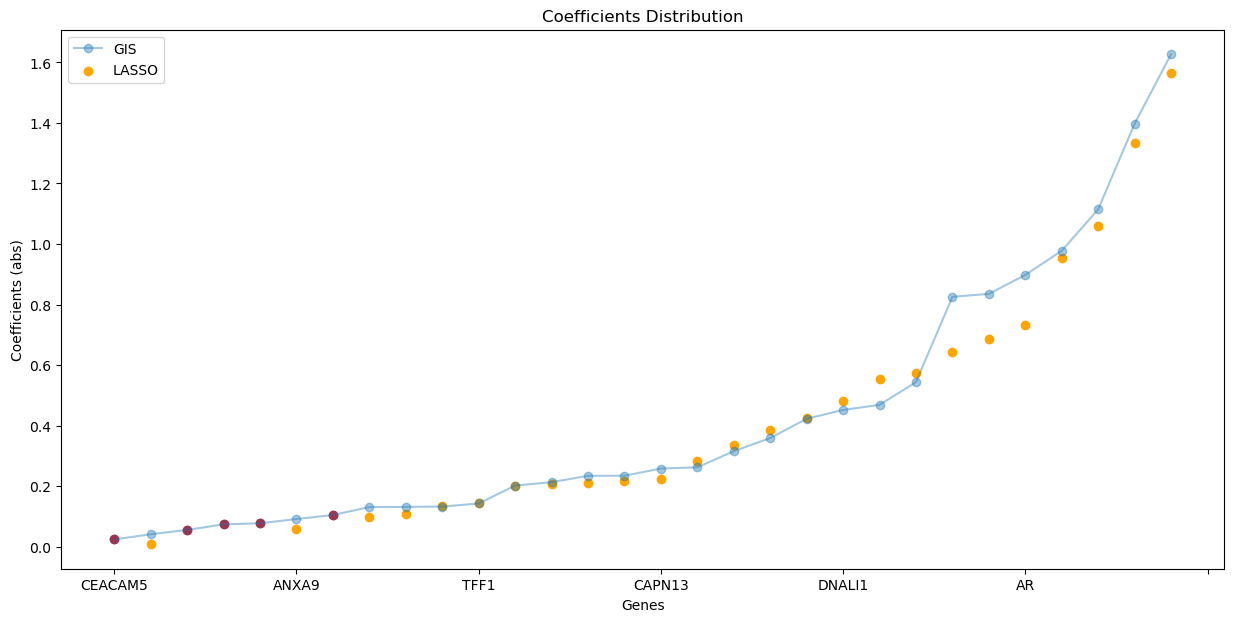

--------------- 1 --------------------
51
0.2912946153474917
56
DCAKD      0.040987
FIGN       0.002422
IGF1R      0.008071
KNDC1      0.017124
LCT        0.082752
PGAP3      0.174137
RET        0.023981
SOX2       0.030025
SULT2B1    0.003920
VANGL2     0.101296
Name: 1, dtype: float64
Shared genes:  46
0.006190021404980012
0.005139283202055367


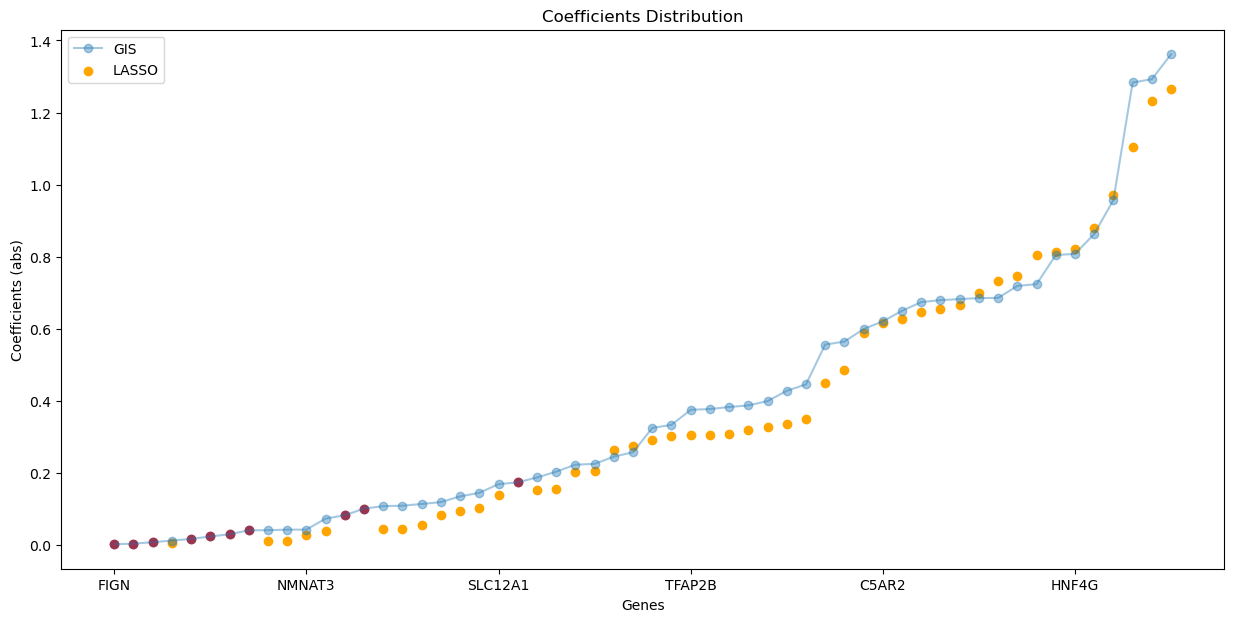

--------------- 2 --------------------
76
0.2580313382867814
86
CCNB1     0.015834
CEP55     0.020969
DCX       0.059255
DLGAP5    0.069332
ERBB4     0.061277
FGF2      0.067152
HBB       0.045983
KDM4B     0.062882
KIF15     0.001944
KIF20A    0.042846
NCAPG2    0.023208
NEDD4L    0.041169
SMC4      0.058438
UFD1L     0.075708
VAMP2     0.137801
Name: 2, dtype: float64
Shared genes:  71
0.0070165941335301575
0.005648618937267389


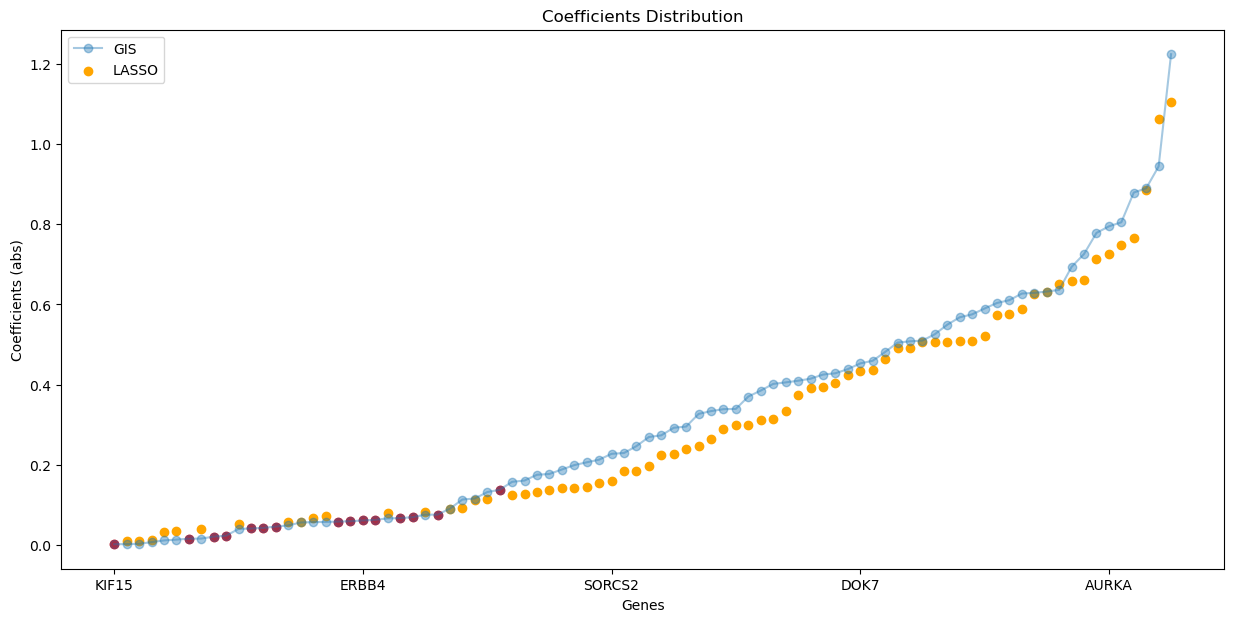

--------------- 3 --------------------
57
0.2686291660532909
63
ADAMTSL3    0.035398
CDH3        0.005331
DCX         0.039797
EIF4A3      0.051689
FAM111A     0.197975
HPGD        0.055476
PDLIM3      0.094792
PRKG2       0.048091
RIPK4       0.093147
RPS4X       0.060093
Name: 3, dtype: float64
Shared genes:  53
0.0006257437273363464
0.0014597478927206094


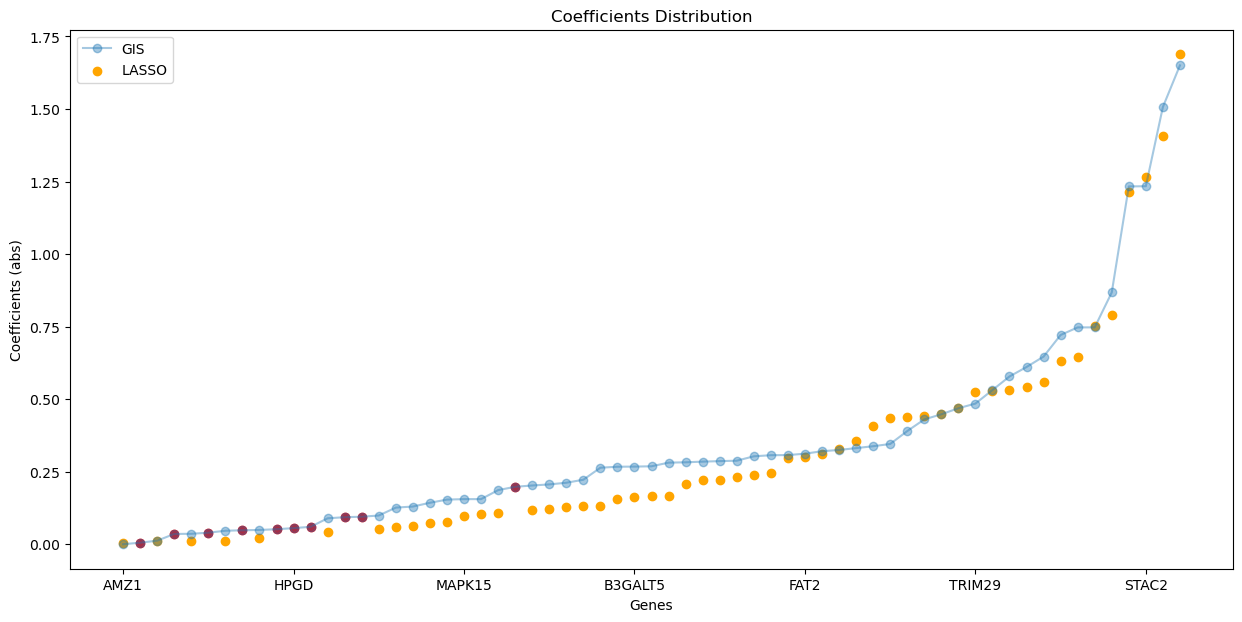

In [14]:
all_genes_new, all_genes_lasso = get_info_coefficients(results_dire_1, results_dire_2, X, 1,  4)

# Not Overlapping Genes

## KEGG

In [15]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(all_genes_lasso, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(all_genes_lasso, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 18
Number of matches:  0
Percentages of matching genes:  0.0
The total number of genes with KEGG annotations in the dataset: 18
Number of matches:  0
Percentages of matching genes:  0.0


In [16]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(all_genes_new, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(all_genes_new, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 39
Number of matches:  3
Percentages of matching genes:  0.07692307692307693
The total number of genes with KEGG annotations in the dataset: 39
Number of matches:  5
Percentages of matching genes:  0.1282051282051282


In [17]:
print(len(all_genes_new))
print(len(all_genes_lasso))

39
18


In [18]:
save_list(all_genes_new, os.path.join(dire_BRCA_results,'all_genes_gis_go_reactome_hpo.txt'))
save_list(all_genes_lasso, os.path.join(dire_BRCA_results,'all_genes_lasso.txt'))

## Malacards - Genes

In [19]:
# check overlap with malacards
genes_malacards_df = pd.read_csv(os.path.join(dire_prior, 'malacards_breast_coding.csv'))
genes_malacards_df = genes_malacards_df.set_index('Symbol')
genes_malacards = genes_malacards_df.index.tolist()

In [20]:
overlap_gis = np.intersect1d(genes_malacards, all_genes_new)
print(len(overlap_gis))

10


In [21]:
overlap_lasso = np.intersect1d(genes_malacards, all_genes_lasso)
print(len(overlap_lasso))

2


In [21]:
#overlap_gis_idx = np.where(np.isin(genes_malacards, overlap_gis))[0]
#overlap_lasso_idx = np.where(np.isin(genes_malacards, overlap_lasso))[0]

## Malacards - GO terms

In [22]:
go_terms_bcra = pd.read_excel(os.path.join(dire_prior, 'GO_terms_disease.xlsx'), sheet_name='Breast')

In [23]:
go_terms_bcra = go_terms_bcra.iloc[:, 1:]
go_terms_bcra.head()

,Name,GO ID,Score,Top Affiliating Genes
0,nucleoplasm,GO:0005654,10.63,AKT1 ATM BARD1 BRCA1 BRCA2 BRIP1
1,protein-containing complex,GO:0032991,10.28,TP53 RAD54L RAD51 PALB2 ESR1 CASP8
2,"chromosome, telomeric region",GO:0000781,10.10,RAD51 NBN CHEK2 BRCA2 ATM
3,PML body,GO:0016605,10.08,TP53 RAD51 NBN CHEK2
4,lateral element,GO:0000800,9.85,BRCA1 BRCA2 RAD51


In [24]:
go_terms_bcra = go_terms_bcra.set_index('GO ID')
go_terms_bcra.head()

,Name,Score,Top Affiliating Genes
GO ID,,,
GO:0005654,nucleoplasm,10.63,AKT1 ATM BARD1 BRCA1 BRCA2 BRIP1
GO:0032991,protein-containing complex,10.28,TP53 RAD54L RAD51 PALB2 ESR1 CASP8
GO:0000781,"chromosome, telomeric region",10.10,RAD51 NBN CHEK2 BRCA2 ATM
GO:0016605,PML body,10.08,TP53 RAD51 NBN CHEK2
GO:0000800,lateral element,9.85,BRCA1 BRCA2 RAD51


In [25]:
go_terms_bcra_list = go_terms_bcra.index.tolist()

In [26]:
files_dire1= os.listdir(results_dire_1)
files_dire1 = [x for x in files_dire1 if x.startswith('significant') and 'info' not in x]
files_dire1.sort()
print(files_dire1)
for i in range(len(files_dire1)):
    dict_dire1 = load_dictionary(os.path.join(results_dire_1, files_dire1[i])) 
    significant_terms = list(dict_dire1['GO'].keys())
    print(np.intersect1d(go_terms_bcra_list, significant_terms))

['significant_terms_Basal.txt.json', 'significant_terms_Her2.txt.json', 'significant_terms_LumA.txt.json', 'significant_terms_LumB.txt.json', 'significant_terms_all.txt.json']
['GO:0043009']
[]
['GO:0005654' 'GO:0006281' 'GO:0006974' 'GO:0007049' 'GO:0051276'
 'GO:0051726']
[]
['GO:0007049' 'GO:0051276' 'GO:0051726']


In [27]:
files_dire2 = os.listdir(results_dire_2)
files_dire2 = [x for x in files_dire2 if x.startswith('significant') and 'info' not in x]
files_dire2.sort()
print(files_dire2)
for i in range(len(files_dire2)):
    dict_dire2 = load_dictionary(os.path.join(results_dire_2, files_dire2[i])) 
    significant_terms = list(dict_dire2['GO'].keys())
    print(np.intersect1d(go_terms_bcra_list, significant_terms))

['significant_terms_Basal.txt.json', 'significant_terms_Her2.txt.json', 'significant_terms_LumA.txt.json', 'significant_terms_LumB.txt.json', 'significant_terms_all.txt.json']
['GO:0001756' 'GO:0043009' 'GO:0045893']
[]
['GO:0005654' 'GO:0007049' 'GO:0051276' 'GO:0051726']
[]
['GO:0000166' 'GO:0007049' 'GO:0051276' 'GO:0051726']
